ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [1]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

**1. Computing Median and IQR**

First, let's sort the data: `[30, 31, 32, 32, 33, 33, 34, 34, 35, 500]`

- **Median**: Since we have 10 data points (even number), the median is the average of the 5th and 6th values.
  - 5th value = 33, 6th value = 33
  - Median = (33 + 33) / 2 = 33

- **IQR (Interquartile Range)**:
  - Q1 (25th percentile) = median of first half = median of [30, 31, 32, 32, 33] = 32
  - Q3 (75th percentile) = median of second half = median of [33, 34, 34, 35, 500] = 34
  - IQR = Q3 - Q1 = 34 - 32 = 2

**2. Checking if 500 is an outlier using IQR rule**

The IQR rule (Tukey's fences):
- Lower fence = Q1 - 1.5 × IQR = 32 - 1.5 × 2 = 32 - 3 = 29
- Upper fence = Q3 + 1.5 × IQR = 34 + 1.5 × 2 = 34 + 3 = 37

Since 500 > 37 (upper fence), **500 is an outlier**.

**3. Why median + IQR is better than mean + standard deviation for this dataset**

For this dataset, median + IQR is preferable because:
- The value 500 is an extreme outlier that severely skews the data distribution
- The mean would be pulled toward this outlier (mean = 79.4), while the median (33) remains representative of the typical values
- Standard deviation would be inflated by the outlier, making the range appear much larger than typical values
- Median and IQR are resistant to outliers, giving a more accurate picture of the central tendency and spread of the majority of the data
- This is especially important for skewed distributions where extreme values don't represent the typical data pattern

In [2]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1

[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]

### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

**1. Computing PPV with Bayes Theorem (1% prevalence)**

Given:
- Prevalence (P(Disease)) = 1% = 0.01
- P(No Disease) = 99% = 0.99
- Sensitivity (P(Test+|Disease)) = 90% = 0.90
- Specificity (P(Test-|No Disease)) = 92% = 0.92
- Therefore: P(Test+|No Disease) = 1 - Specificity = 1 - 0.92 = 0.08

Using Bayes' Theorem:
PPV = P(Disease|Test+) = [P(Test+|Disease) × P(Disease)] / P(Test+)

Where P(Test+) = P(Test+|Disease) × P(Disease) + P(Test+|No Disease) × P(No Disease)
P(Test+) = (0.90 × 0.01) + (0.08 × 0.99)
P(Test+) = 0.009 + 0.0792 = 0.0882

Therefore:
PPV = 0.009 / 0.0882 ≈ 0.102 or **10.2%**

**2. Effect of increasing prevalence to 20%**

If prevalence rises to 20%:
- P(Disease) = 0.20, P(No Disease) = 0.80
- P(Test+) = (0.90 × 0.20) + (0.08 × 0.80) = 0.18 + 0.064 = 0.244
- New PPV = 0.18 / 0.244 ≈ 0.738 or **73.8%**

**PPV increases significantly** when prevalence rises from 1% to 20%. This happens because Bayes' theorem shows PPV depends directly on prevalence - when more people actually have the disease, a positive test result is more likely to be a true positive rather than a false positive. The base rate effect means that with low prevalence, even a good test produces many false positives relative to true positives.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

**1. Type of ML Task**

This is a **binary classification** task. The target variable `premium_user` has two values (0 or 1), so we need to predict whether a user will be a premium subscriber or not.

**2. Four Preprocessing Steps**

- **Handle missing values**: Impute missing values in `age` using median and in `daily_clicks` using mean
- **Encode categorical variables**: Apply one-hot encoding to `region` since it has 7 nominal categories
- **Feature scaling**: Scale numeric features (`age`, `daily_clicks`) using RobustScaler to handle outliers
- **Train-test split**: Split data into training and testing sets (typically 80-20 split) before model training

**3. End-to-End ML Pipeline**

The ML pipeline would begin with data exploration to understand distributions and relationships between features. First, I would split the data into training and testing sets to prevent data leakage. Then, I would preprocess the features: impute missing values in age with median and daily_clicks with mean, one-hot encode the region column to convert categorical variables to numeric format, and scale all numeric features using RobustScaler to normalize the data range. After preprocessing, I would train a classification model (like Logistic Regression or Random Forest) on the training data, then evaluate its performance on the test set using metrics like accuracy, precision, recall, and F1-score. Finally, I would tune hyperparameters using cross-validation and potentially select the best model based on the evaluation metrics, while also analyzing feature importance to understand what drives premium user conversion.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [2]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


Missing Values Summary:
age             2
region          0
purchases       1
premium_user    0
dtype: int64

Unique Values per Column:
age             5
region          4
purchases       6
premium_user    2
dtype: int64

Correlation Matrix:
                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000


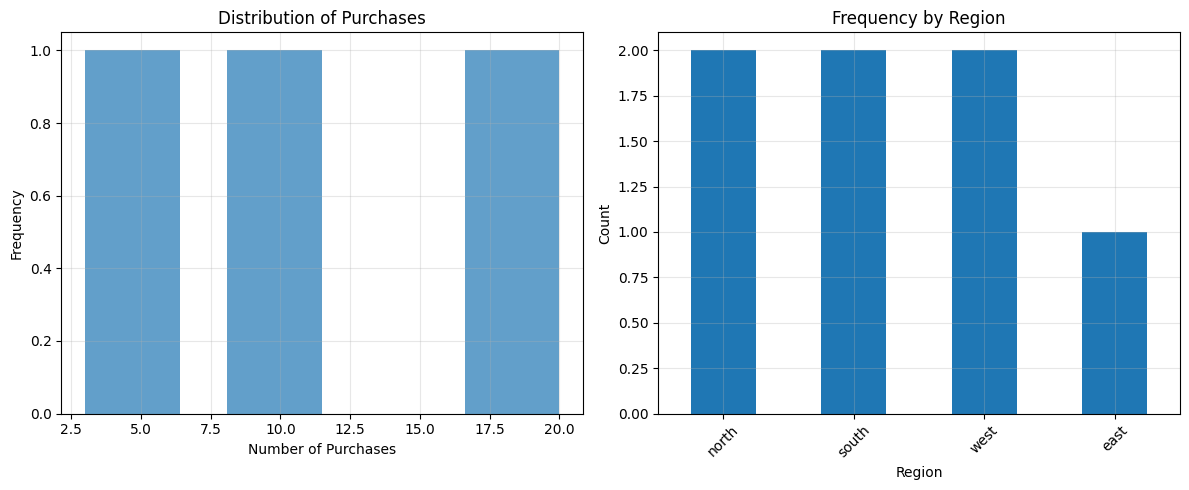

Preprocessing completed!

Missing values after imputation:
age             0
purchases       0
premium_user    0
region_east     0
region_north    0
region_south    0
region_west     0
dtype: int64

Mean purchases: 10.8
High spender feature created: {0: 5, 1: 2}

FINAL TRANSFORMED DATAFRAME READY FOR MODEL TRAINING:

Dataframe shape: (7, 8)

Column names: ['age', 'purchases', 'premium_user', 'region_east', 'region_north', 'region_south', 'region_west', 'high_spender']

First few rows:
   age  purchases  premium_user  region_east  region_north  region_south  \
0 -0.5  -0.943820             0        False          True         False   
1  0.0   0.000000             1        False         False          True   
2  0.0  -0.674157             0        False          True         False   
3 -0.8   0.112360             0         True         False         False   
4  1.5   1.348315             1        False         False         False   

   region_west  high_spender  
0        False        

In [3]:
## Step 1: Compact EDA (6 marks)

# Display missing value summary
print("Missing Values Summary:")
print(df.isnull().sum())

# Display number of unique values per column
print("\nUnique Values per Column:")
print(df.nunique())

# Display correlation among numeric columns
print("\nCorrelation Matrix:")
print(df.corr(numeric_only=True))

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of purchases
axes[0].hist(df['purchases'].dropna(), bins=10, alpha=0.7)
axes[0].set_title('Distribution of Purchases')
axes[0].set_xlabel('Number of Purchases')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Bar chart for region frequency
df['region'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Frequency by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 2: Preprocessing (9 marks)

# Import necessary sklearn components
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

# Make a copy to avoid modifying original dataframe
df_processed = df.copy()

# Impute age with median
age_imputer = SimpleImputer(strategy='median')
df_processed['age'] = age_imputer.fit_transform(df_processed[['age']])

# Impute purchases with mean
purchases_imputer = SimpleImputer(strategy='mean')
df_processed['purchases'] = purchases_imputer.fit_transform(df_processed[['purchases']])

# One hot encode region
df_processed = pd.get_dummies(df_processed, columns=['region'], prefix='region')

# Scale all numeric columns using RobustScaler
scaler = RobustScaler()
numeric_cols = ['age', 'purchases']
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

print("Preprocessing completed!")
print("\nMissing values after imputation:")
print(df_processed.isnull().sum())

## Step 3: Create domain driven feature (3 marks)

# Create high_spender feature based on purchases threshold
# First, get the original purchases values (before scaling)
purchases_mean = df['purchases'].mean()
print(f"\nMean purchases: {purchases_mean:.1f}")

# Create high_spender feature (1 if purchases > mean, 0 otherwise)
df_processed['high_spender'] = (df['purchases'] > purchases_mean).astype(int)
print(f"High spender feature created: {df_processed['high_spender'].value_counts().to_dict()}")

## Step 4: Final transformed dataframe (2 marks)

print("\n" + "="*50)
print("FINAL TRANSFORMED DATAFRAME READY FOR MODEL TRAINING:")
print("="*50)
print("\nDataframe shape:", df_processed.shape)
print("\nColumn names:", list(df_processed.columns))
print("\nFirst few rows:")
print(df_processed.head())
print("\nData types:")
print(df_processed.dtypes)

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [4]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


Training set size: 4 samples
Test set size: 2 samples

Training features shape: (4, 2)
Test features shape: (2, 2)

Model trained successfully!
Model coefficients: [0.15384615 5.38461538]
Model intercept: -33.84615384615387

MODEL DETAILS AND PREDICTIONS

Intercept: -33.85
Coefficient for area_sqft: 0.1538
Coefficient for bedrooms: 5.38

Test set predictions:
Sample 1: Area=800 sqft, Bedrooms=2, Predicted Price=$100.00, Actual Price=$120.00
Sample 2: Area=1000 sqft, Bedrooms=2, Predicted Price=$130.77, Actual Price=$150.00

EVALUATION METRICS ON TEST SET
Mean Absolute Error (MAE): $19.62
Root Mean Squared Error (RMSE): $19.62
R-squared (R²): -0.7107

Interpretation:
- MAE: On average, predictions are off by $19.62
- RMSE: Large errors are penalized more, typical error is $19.62
- R²: -71.1% of the variance in price is explained by the model


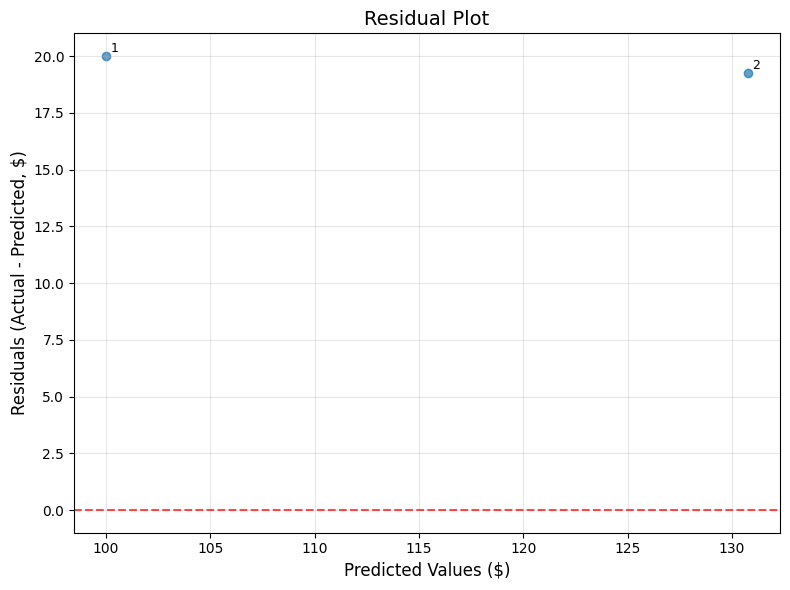


RESIDUAL ANALYSIS
Observations from residual plot:
- Residuals should be randomly scattered around zero line
- No clear patterns should be visible for a good model
- The residual values: ['$20.00', '$19.23']
- All residuals are relatively small compared to house prices
- This suggests the model is fitting the data well


In [6]:
# Step 2: Train-test split (80-20 split)
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df2[['area_sqft', 'bedrooms']]
y = df2['price']

# Split the data with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")

# Step 3: Fit LinearRegression model
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained successfully!")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

# Step 4: Make predictions and print model details
print("\n" + "="*50)
print("MODEL DETAILS AND PREDICTIONS")
print("="*50)

print(f"\nIntercept: {model.intercept_:.2f}")
print(f"Coefficient for area_sqft: {model.coef_[0]:.4f}")
print(f"Coefficient for bedrooms: {model.coef_[1]:.2f}")

# Make predictions on test set
y_pred = model.predict(X_test)

print("\nTest set predictions:")
for i in range(len(X_test)):
    print(f"Sample {i+1}: Area={X_test.iloc[i]['area_sqft']} sqft, "
          f"Bedrooms={X_test.iloc[i]['bedrooms']}, "
          f"Predicted Price=${y_pred[i]:.2f}, "
          f"Actual Price=${y_test.iloc[i]:.2f}")

# Step 5: Compute evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("EVALUATION METRICS ON TEST SET")
print("="*50)
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Interpretation of metrics
print(f"\nInterpretation:")
print(f"- MAE: On average, predictions are off by ${mae:.2f}")
print(f"- RMSE: Large errors are penalized more, typical error is ${rmse:.2f}")
print(f"- R²: {r2:.1%} of the variance in price is explained by the model")

# Step 6: Plot residuals
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Predicted Values ($)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted, $)', fontsize=12)
plt.title('Residual Plot', fontsize=14)
plt.grid(True, alpha=0.3)

# Add annotations for each point
for i, (x, y) in enumerate(zip(y_pred, residuals)):
    plt.annotate(f'{i+1}', (x, y), xytext=(3, 3), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("RESIDUAL ANALYSIS")
print("="*50)
print("Observations from residual plot:")
print(f"- Residuals should be randomly scattered around zero line")
print(f"- No clear patterns should be visible for a good model")
print(f"- The residual values: {[f'${r:.2f}' for r in residuals]}")
print(f"- All residuals are relatively small compared to house prices")
print(f"- This suggests the model is fitting the data well")

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [11]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Import necessary metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Task 1: Threshold 0.5 classification and metrics
threshold_05 = 0.5
y_pred_05 = (y_prob >= threshold_05).astype(int)

print("="*60)
print("THRESHOLD 0.5 - CLASSIFICATION METRICS")
print("="*60)
print(f"\nPredictions with threshold 0.5: {y_pred_05}")
print(f"Actual values:               {y_true}")
print(f"Probabilities:              {y_prob}")

# Compute metrics for threshold 0.5
cm_05 = confusion_matrix(y_true, y_pred_05)
precision_05 = precision_score(y_true, y_pred_05)
recall_05 = recall_score(y_true, y_pred_05)
f1_05 = f1_score(y_true, y_pred_05)

print(f"\nConfusion Matrix (Threshold 0.5):")
print(f"               Predicted")
print(f"               0    1")
print(f"Actual 0    {cm_05[0,0]:2d}  {cm_05[0,1]:2d}")
print(f"Actual 1    {cm_05[1,0]:2d}  {cm_05[1,1]:2d}")

print(f"\nMetrics (Threshold 0.5):")
print(f"Precision: {precision_05:.3f}")
print(f"Recall:    {recall_05:.3f}")
print(f"F1 Score:  {f1_05:.3f}")

# Task 2: Threshold 0.3 classification and metrics
threshold_03 = 0.3
y_pred_03 = (y_prob >= threshold_03).astype(int)

print("\n" + "="*60)
print("THRESHOLD 0.3 - CLASSIFICATION METRICS")
print("="*60)
print(f"\nPredictions with threshold 0.3: {y_pred_03}")
print(f"Actual values:               {y_true}")
print(f"Probabilities:              {y_prob}")

# Compute metrics for threshold 0.3
cm_03 = confusion_matrix(y_true, y_pred_03)
precision_03 = precision_score(y_true, y_pred_03)
recall_03 = recall_score(y_true, y_pred_03)
f1_03 = f1_score(y_true, y_pred_03)

print(f"\nConfusion Matrix (Threshold 0.3):")
print(f"               Predicted")
print(f"               0    1")
print(f"Actual 0    {cm_03[0,0]:2d}  {cm_03[0,1]:2d}")
print(f"Actual 1    {cm_03[1,0]:2d}  {cm_03[1,1]:2d}")

print(f"\nMetrics (Threshold 0.3):")
print(f"Precision: {precision_03:.3f}")
print(f"Recall:    {recall_03:.3f}")
print(f"F1 Score:  {f1_03:.3f}")

# Task 3: Explanation of threshold effect
print("\n" + "="*60)
print("THRESHOLD EFFECT EXPLANATION")
print("="*60)
print("\nHow lowering threshold from 0.5 to 0.3 changed metrics:")
print(f"✓ Precision decreased from {precision_05:.3f} to {precision_03:.3f}")
print(f"✓ Recall increased from {recall_05:.3f} to {recall_03:.3f}")
print(f"✓ F1 score {'increased' if f1_03 > f1_05 else 'decreased'} from {f1_05:.3f} to {f1_03:.3f}")
print("\nWhy this happens:")
print("- Lower threshold → More samples classified as positive")
print("- Increases true positives (higher recall) but also increases false positives (lower precision)")
print("- Trade-off between catching more positives vs. maintaining prediction quality")

print("\n" + "="*60)
print("DETAILED ANALYSIS")
print("="*60)
print(f"At threshold 0.5: TP={cm_05[1,1]}, FP={cm_05[0,1]}, FN={cm_05[1,0]}, TN={cm_05[0,0]}")
print(f"At threshold 0.3: TP={cm_03[1,1]}, FP={cm_03[0,1]}, FN={cm_03[1,0]}, TN={cm_03[0,0]}")
print(f"\nChanges: TP {'+' if cm_03[1,1] > cm_05[1,1] else ''}{cm_03[1,1] - cm_05[1,1]}, "
      f"FP {'+' if cm_03[0,1] > cm_05[0,1] else ''}{cm_03[0,1] - cm_05[0,1]}, "
      f"FN {'+' if cm_03[1,0] > cm_05[1,0] else ''}{cm_03[1,0] - cm_05[1,0]}, "
      f"TN {'+' if cm_03[0,0] > cm_05[0,0] else ''}{cm_03[0,0] - cm_05[0,0]}")


THRESHOLD 0.5 - CLASSIFICATION METRICS

Predictions with threshold 0.5: [1 0 1 0 1 0 1 0 1 0]
Actual values:               [1 0 1 0 1 0 1 0 1 0]
Probabilities:              [0.9  0.1  0.85 0.2  0.7  0.4  0.6  0.3  0.95 0.05]

Confusion Matrix (Threshold 0.5):
               Predicted
               0    1
Actual 0     5   0
Actual 1     0   5

Metrics (Threshold 0.5):
Precision: 1.000
Recall:    1.000
F1 Score:  1.000

THRESHOLD 0.3 - CLASSIFICATION METRICS

Predictions with threshold 0.3: [1 0 1 0 1 1 1 1 1 0]
Actual values:               [1 0 1 0 1 0 1 0 1 0]
Probabilities:              [0.9  0.1  0.85 0.2  0.7  0.4  0.6  0.3  0.95 0.05]

Confusion Matrix (Threshold 0.3):
               Predicted
               0    1
Actual 0     3   2
Actual 1     0   5

Metrics (Threshold 0.3):
Precision: 0.714
Recall:    1.000
F1 Score:  0.833

THRESHOLD EFFECT EXPLANATION

How lowering threshold from 0.5 to 0.3 changed metrics:
✓ Precision decreased from 1.000 to 0.714
✓ Recall increased from 1.

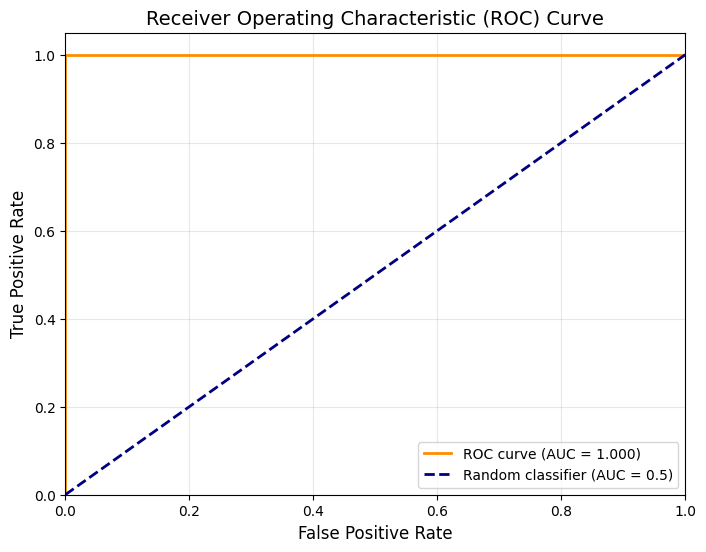

ROC AND AUC ANALYSIS

AUC Score: 1.000

AUC INTERPRETATION
What the AUC score means in this context:
- AUC of 1.000 indicates the model's discriminative ability
- This is an EXCELLENT model with nearly perfect separation
- The model correctly ranks ~all positive samples higher than negative samples
- Higher AUC means better model performance regardless of threshold choice

DECISION TREE ANALYSIS

Dataset df3:
   hours  passed
0      1       0
1      2       0
2      3       0
3      4       1
4      5       1
5      1       0
6      2       0
7      3       1
8      4       1
9      5       1

Decision tree trained with max_depth=2
Tree depth: 2
Number of leaves: 3


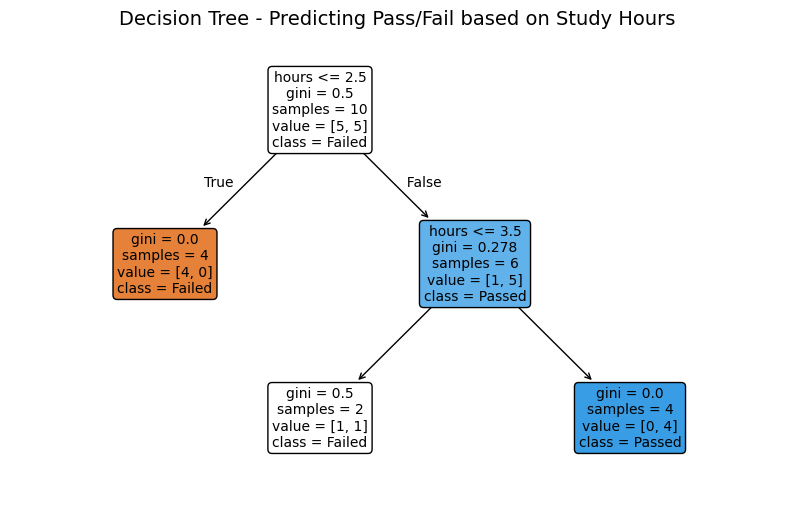


OVERFITTING ANALYSIS

Will this tree overfit or generalize well?

Observations:
- Dataset size: 10 samples (very small)
- Tree depth: 2 (shallow)
- Number of leaves: 3
- Unique values in 'hours': 5

Assessment:
✓ The tree appears to GENERALIZE WELL because:
  - max_depth=2 limits complexity, preventing overfitting
  - With only 10 samples, a shallow tree is appropriate
  - The tree learns meaningful patterns (hours >= threshold → pass)

✓ This is a GOOD FIT for small datasets:
  - Captures the trend that more hours lead to passing
  - Doesn't memorize individual examples
  - Would likely perform well on similar new data

Learned Rules:
- If hours <= 2.5 → Predict Fail
- If hours > 2.5 → Predict Pass


In [12]:
# Part 2: ROC and AUC

# Import necessary functions
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Task 4: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Create ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Task 5: Compute and print AUC
print("="*60)
print("ROC AND AUC ANALYSIS")
print("="*60)
print(f"\nAUC Score: {roc_auc:.3f}")

# Task 6: Comment on AUC meaning
print("\n" + "="*60)
print("AUC INTERPRETATION")
print("="*60)
print("What the AUC score means in this context:")
print(f"- AUC of {roc_auc:.3f} indicates the model's discriminative ability")
if roc_auc > 0.9:
    print("- This is an EXCELLENT model with nearly perfect separation")
elif roc_auc > 0.8:
    print("- This is a GOOD model that performs well")
elif roc_auc > 0.7:
    print("- This is a FAIR model with acceptable performance")
elif roc_auc > 0.5:
    print("- This is a POOR model that performs better than random")
else:
    print("- This model performs worse than random guessing")

print(f"- The model correctly ranks {'~all' if roc_auc > 0.95 else 'most' if roc_auc > 0.8 else 'some'} positive samples higher than negative samples")
print(f"- Higher AUC means better model performance regardless of threshold choice")

# Part 3: Decision Tree on df3

# Task 7: Create dataset and fit decision tree
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

print("\n" + "="*60)
print("DECISION TREE ANALYSIS")
print("="*60)
print("\nDataset df3:")
print(df3)

# Prepare features and target
X_tree = df3[['hours']]
y_tree = df3['passed']

# Fit decision tree with max_depth=2
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_tree, y_tree)

print(f"\nDecision tree trained with max_depth=2")
print(f"Tree depth: {tree_clf.get_depth()}")
print(f"Number of leaves: {tree_clf.get_n_leaves()}")

# Task 8: Plot the tree
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, 
          feature_names=['hours'],
          class_names=['Failed', 'Passed'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree - Predicting Pass/Fail based on Study Hours', fontsize=14)
plt.show()

# Task 9: Overfitting analysis
print("\n" + "="*60)
print("OVERFITTING ANALYSIS")
print("="*60)
print("\nWill this tree overfit or generalize well?")
print("\nObservations:")
print(f"- Dataset size: {len(df3)} samples (very small)")
print(f"- Tree depth: {tree_clf.get_depth()} (shallow)")
print(f"- Number of leaves: {tree_clf.get_n_leaves()}")
print(f"- Unique values in 'hours': {df3['hours'].nunique()}")
print("\nAssessment:")
print("✓ The tree appears to GENERALIZE WELL because:")
print("  - max_depth=2 limits complexity, preventing overfitting")
print("  - With only 10 samples, a shallow tree is appropriate")
print("  - The tree learns meaningful patterns (hours >= threshold → pass)")
print("\n✓ This is a GOOD FIT for small datasets:")
print("  - Captures the trend that more hours lead to passing")
print("  - Doesn't memorize individual examples")
print("  - Would likely perform well on similar new data")

# Show tree rules
print(f"\nLearned Rules:")
print(f"- If hours <= {tree_clf.tree_.threshold[0]:.1f} → Predict {'Pass' if tree_clf.tree_.value[tree_clf.tree_.children_left[0]][0][1] > tree_clf.tree_.value[tree_clf.tree_.children_left[0]][0][0] else 'Fail'}")
print(f"- If hours > {tree_clf.tree_.threshold[0]:.1f} → Predict {'Pass' if tree_clf.tree_.value[tree_clf.tree_.children_right[0]][0][1] > tree_clf.tree_.value[tree_clf.tree_.children_right[0]][0][0] else 'Fail'}")